<a href="https://colab.research.google.com/github/ll-n/ML-DL-Real-World-Projects/blob/main/Project_2_CiFAR_10_Images_Classification_Using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning for Image Classification**



Classifying **CIFAR-10 images** using Convolutional Neural Networks (CNNs) is a common task in computer vision.<br> CIFAR-10 is a dataset that consists of 60,000 32x32 color images belonging to 10 different classes, with 6,000 images per class.<br> **The goal** is to train a CNN model to correctly classify these images into their respective categories.

#  IMPORT LIBRARIES/DATASETS 📥

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Print the shape of the CIFAR-10 dataset
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (50000, 32, 32, 3) (50000, 1)
Testing set shape: (10000, 32, 32, 3) (10000, 1)


# VISUALIZE DATA

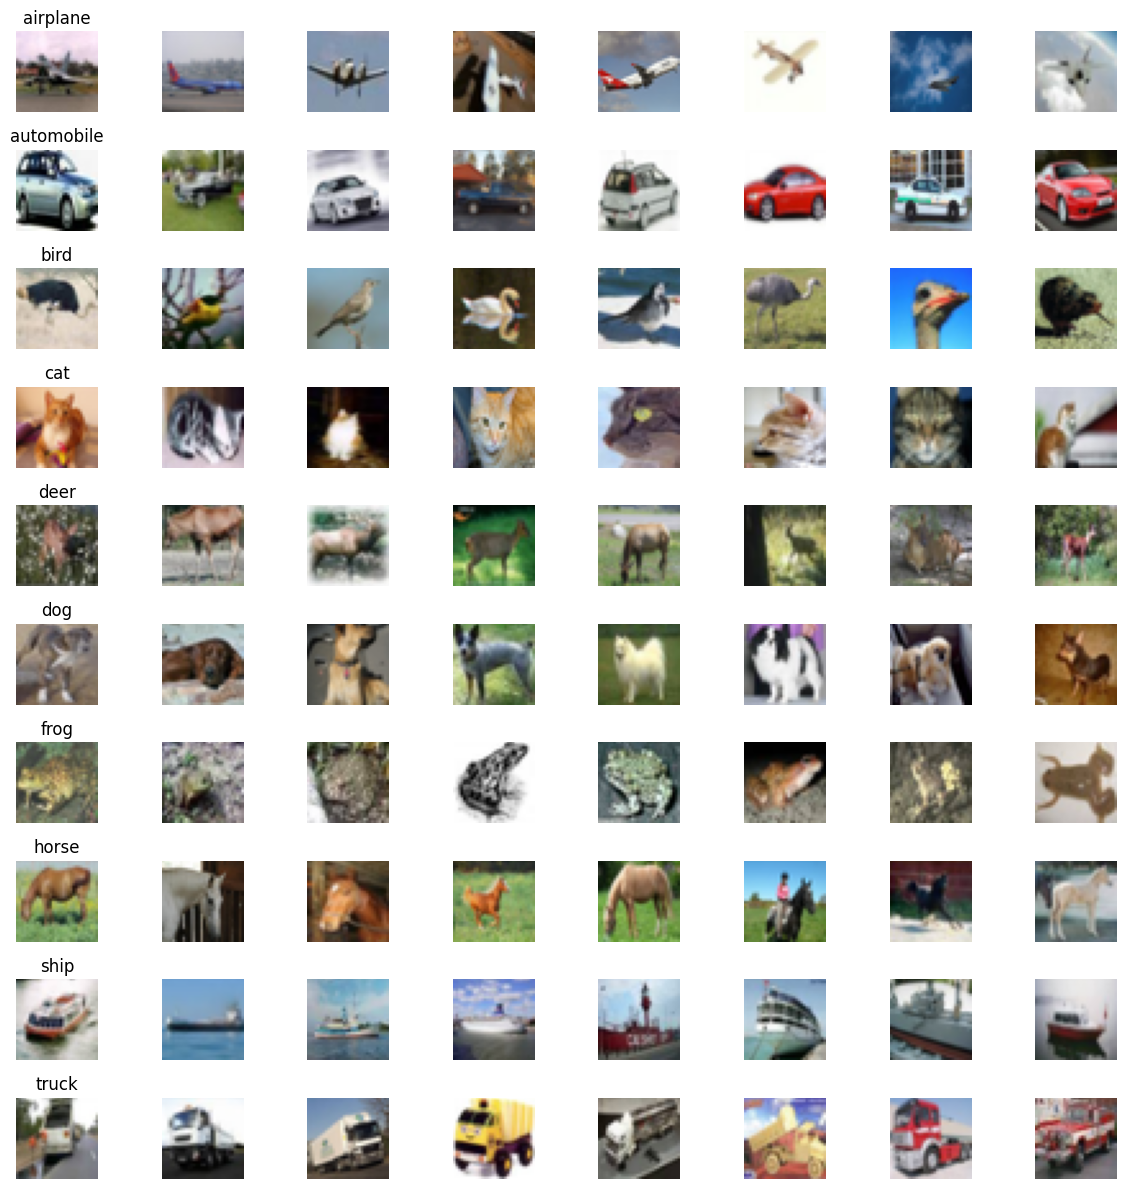

In [9]:
class_labels = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat',
    4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

num_images = 8

fig, axes = plt.subplots(len(class_labels), num_images, figsize=(12, 12))

for i, class_index in enumerate(class_labels.keys()):
    # Get the indices of images belonging to the current class
    indices = (y_train.flatten() == class_index).nonzero()[0]
    # Select random images from the class
    random_indices = np.random.choice(indices, size=num_images, replace=False)
    # Display the images in the grid
    for j, image_index in enumerate(random_indices):
        axes[i, j].imshow(X_train[image_index])
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(class_labels[class_index])

plt.tight_layout()
plt.show()

In [10]:
class_counts = np.bincount(y_train.flatten())
print('- Number of observations in each class:')
for i, count in enumerate(class_counts):
    class_name = class_labels[i]
    print(f"Class: {class_name}, Count: {count}")

- Number of observations in each class:
Class: airplane, Count: 5000
Class: automobile, Count: 5000
Class: bird, Count: 5000
Class: cat, Count: 5000
Class: deer, Count: 5000
Class: dog, Count: 5000
Class: frog, Count: 5000
Class: horse, Count: 5000
Class: ship, Count: 5000
Class: truck, Count: 5000


#  DATA PREPARATION

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
number_cat = 10

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [19]:
X_train = X_train/255
X_test = X_test/255


In [20]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
Input_shape = X_train.shape[1:]

In [23]:
Input_shape

(32, 32, 3)

#  TRAIN THE MODEL

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [25]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [26]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])

In [28]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 20, shuffle = True)

Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7854 - accuracy: 0.7477
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7644 - accuracy: 0.7569
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7611 - accuracy: 0.7573
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7424 - accuracy: 0.7638
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7139 - accuracy: 0.7722
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7084 - accuracy: 0.7738
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6951 - accuracy: 0.7801
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6923 - accuracy: 0.7818
Epoch 9/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6798 - accuracy: 0.7849
Epoch 10/20
1563/1563 [==============================] - 11s 7ms/step - l

Text(0.5, 1.0, 'Accuracy Curves')

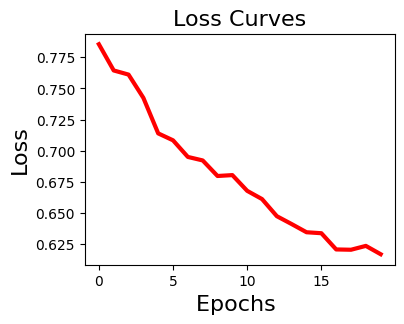

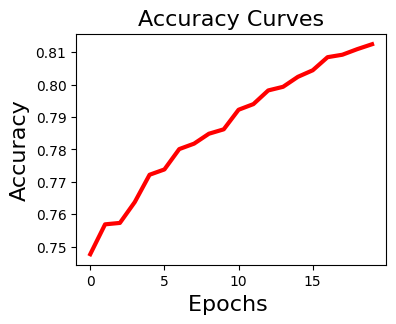

In [30]:
# Loss Curves
plt.figure(figsize=[4,3])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[4,3])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

#  EVALUATE THE MODEL

In [31]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.9358 - accuracy: 0.7467
Test Accuracy: 0.7466999888420105


In [34]:
predictions = cnn_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)

313/313 [==============================] - 1s 2ms/step
[3 8 8 ... 5 1 7]


In [35]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [36]:
y_test = y_test.argmax(1)

In [37]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

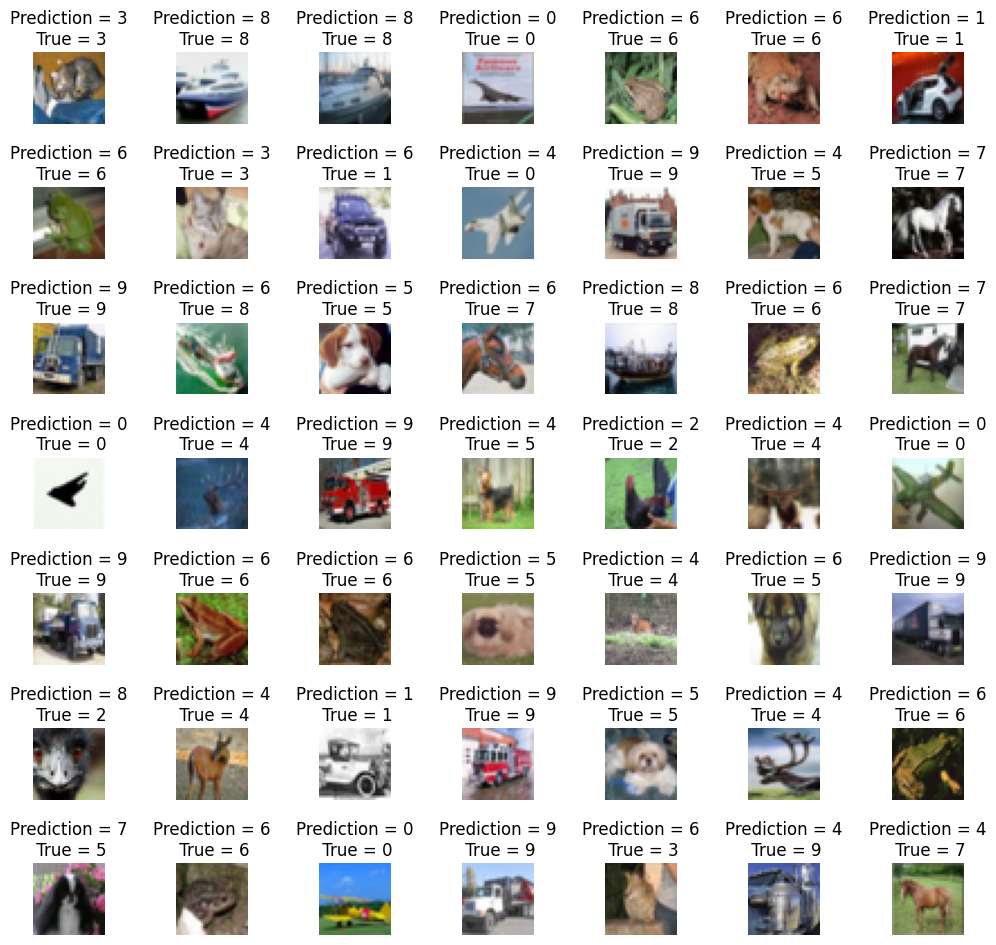

In [38]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

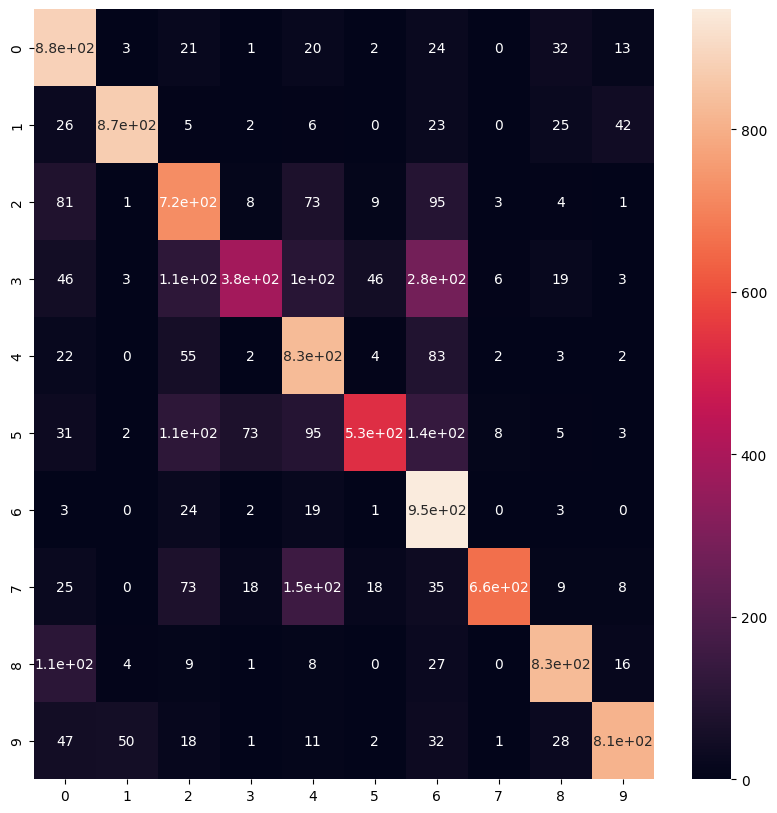

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

**IMPROVING THE MODEL WITH DATA AUGMENTATION**



- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images.
- Augmentations also include shifting and changing the brightness of the images.

In [40]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [41]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [42]:
X_train.shape

(50000, 32, 32, 3)

In [43]:
n = 8
X_train_sample = X_train[:n]

In [44]:
X_train_sample.shape

(8, 32, 32, 3)

In [47]:
from keras.preprocessing.image import ImageDataGenerator

dataget_train = ImageDataGenerator(rotation_range = 90)


dataget_train.fit(X_train_sample)

# MODEL TRAINING USING AUGEMENTED DATASET

In [52]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [53]:
datagen.fit(X_train)

In [54]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2


<ipython-input-54-7c51626cc5e7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)


1563/1563 [==============================] - 25s 16ms/step - loss: 308.7475 - accuracy: 6.0000e-04
Epoch 2/2
1563/1563 [==============================] - 24s 15ms/step - loss: 107.2515 - accuracy: 0.0000e+00
